# Part II - Ford GoBike System Data Analysis
## by Omoniyi Akinpelumi


## Dataset Overview

> The modified dataset has 174952 observations and 18 features. Within this data are 4607 unique bikers and 329 unique bike station information to be analysed. These dataset also have a good mixture of strings, floats and int data types. 

The main features of the dataset are the 
- Duration of trip
- Time/Date of trip
- Distance of Trip (culled from feature engineering the Latitiude and Longitiude coordinates)
- Bike user type category
- Bike gender category
- Biker age grade category
- Biker distance
- Biker average speed (culled from feature engineering the trip distance against trip duration) 

## Project Objective

The main goal of this data analysis is to find and explore important features of the bike sharing dataset which would provide useful insights on the bike-sharing system operations? Some of the insights observed by exploring the relationships between the dataset features are as follows: 

## Investigation Overview

- An overview of the modified dataset shows that 91% of the bikers are subscribers, 9% are customers. 75% of bikers are male, 23% females, 2% identify as others. 10% of the bikers prefer the biker sharing option while 90% do not.

- Thursdays are more popular amongs bikers for a trip start while weekends generally have low number of bike trip starts for  subscriber user types. For customers, wedneday have the lowest number of bike start trip engagements with thursdays the highest

- On weekends, there are more bike trips in the afternoon period than any time period, while on weekdays, the morning period have the most bike trip start engagments. The elderly age group are less reluntant to start bike trip on weekends

- 75% of bikers covered a distance of 2.2km for a period of about 13 minutes (less than an hour). Although, there were few bike trips with long duration of a maximum period of about 1400 minutes. This could be that bikers took rest breaks before completing the trip 

- More subscribers tend to engage in longer distance bike trips than customers. However, there is no distinct difference on which type of biker (between the subscriber and customer) spends longer duration on bike trips  

- More of the male gender bikers tend to engage in longer distance bike trips than other genders.

In [31]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [32]:
# load in the dataset into a pandas dataframe
df = pd.read_csv(r'C:\Users\omoni\OneDrive - The University of Manchester\Huawei Laptop\DS_ML_AI\ALT-X\Project 3\Submission\modified_FordGoBike.csv')

## Visualization 1 - Pie Chart Distribution of User type, Gender and Share options

The first goal was to understand the distribution of key categorical variables that may affect bike trips in the dataset. The focus was on understanding the customer vs subcriber ratios, gender distribution ratio and bike trip share options. The proportions of this data features are shown in the sub-slide below

In [33]:
#pie chart generation function
def pie_chart(col_name, label_name):
    sorted_counts = df[col_name].value_counts()
    plt.pie(sorted_counts, labels=sorted_counts.index, startangle=90, counterclock=False, autopct='%.0f%%')
    plt.axis('square');

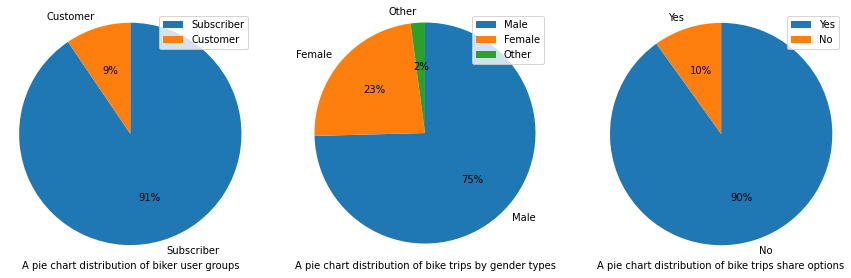

In [34]:
plt.figure(figsize=[15,5])

#illustrate the biker user group distribution using relative frequencies
plt.subplot(1,3,1)
pie_chart('user_type','Biker User group distribution')
plt.xlabel('A pie chart distribution of biker user groups');
plt.legend(['Subscriber', 'Customer']);

#illustrate the gender group distribution of bikers using its relative frequencies
plt.subplot(1,3,2)
pie_chart('member_gender','Gender distribution of Bikers')
plt.xlabel('A pie chart distribution of bike trips by gender types');
plt.legend(['Male', 'Female', 'Other']);

#illustrate the bike sharing options 
plt.subplot(1,3,3)
pie_chart('bike_share_for_all_trip','Bike sharing option distribution')
plt.xlabel('A pie chart distribution of bike trips share options');
plt.legend(['Yes', 'No']);

## Visualization 2 - Kde Plot Distribution of Hourly Start and End Trips

Secondly, it was important to also understand the distribution of start and end hour bike trips. It was observed that there are generally two peak times (morning and evening) for the bike trips on any average day as available in the dataset. This plot is illustrated in the sub-slide below

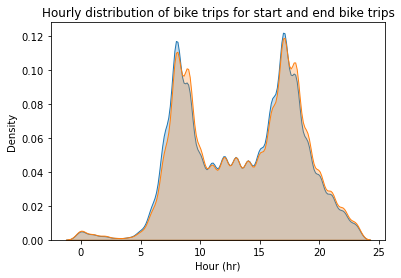

In [35]:
#plot of the start-hour and end-hour distribution
sns.kdeplot(df.start_hour, shade=True) #blue color
sns.kdeplot(df.end_hour, shade=True) #orange color
plt.xlabel('Hour (hr)')
plt.title('Hourly distribution of bike trips for start and end bike trips')
plt.show()

## Visualization 3 - Scatter and Heat Map Plot on Trip duration and Trip Distance

To understand the relationship between the bike trip duration times and distance covered based on values within the dataset as shown in the data plot below. A scatter plot and heatmap plot are used in convening this message as shown in the sub-slide below

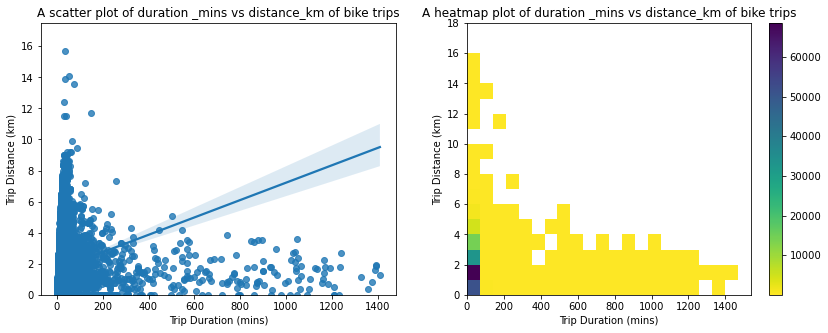

In [36]:
#Use the seaborn regplot to illustrate the relationship between duration and distance covered 
#With Outlier
plt.figure(figsize=[14,5])

plt.subplot(1,2,1)
plt.title('A scatter plot of duration _mins vs distance_km of bike trips')
sns.regplot(data=df, y='distance_km', x='duration_mins');
plt.xlabel('Trip Duration (mins)');
plt.ylabel('Trip Distance (km)');
plt.ylim((0,17.5));

plt.subplot(1,2,2)
plt.title('A heatmap plot of duration _mins vs distance_km of bike trips')
bins_x = np.arange(0, 1550+1.1, 70)
bins_y = np.arange(0, 70+1.1, 1)
plt.hist2d(data=df, x='duration_mins', y='distance_km', cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y]);
plt.ylim((0,18));
plt.colorbar()
plt.xlabel('Trip Duration (mins)');
plt.ylabel('Trip Distance (km)');

## Visualization 4 - Scatter and Heat Map Plot on Start day and Age Grade Relationship

Using a clustered bar plot and a heatmap plot, I was able to understand the relationship pattern of trip start days of the week  vs the age grade of bikers. It was important to understand which age group would tend to engage in bike trip and at which day of the week. These plots are illustrated in the sub-slide below

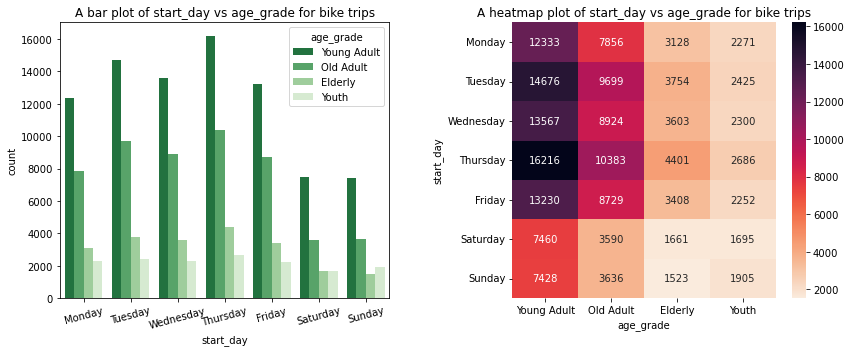

In [37]:
ordered_days = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']
start_day = pd.api.types.CategoricalDtype(ordered=True, categories=ordered_days)
df['start_day'] = df['start_day'].astype(start_day)

# re-ordering the categorical age_grade type 
age_grade = ['Young Adult', 'Old Adult', 'Elderly', 'Youth']
agrade = pd.api.types.CategoricalDtype(ordered=True, categories=age_grade)
df['age_grade'] = df['age_grade'].astype(agrade);

#create a dataframe with age-grades, start-days and counts  
age_counts = df.groupby(['start_day','age_grade']).size()
age_counts = age_counts.reset_index(name='count')
age_counts = age_counts.pivot(index='start_day', columns='age_grade', values='count')

def countplot_heatmap(x,y,palette_type,df,mod_counts,cmap_type):
    plt.figure(figsize=[12,5]);
    plt.subplot(1,2,1)
    plt.title('A bar plot of {} vs {} for bike trips'.format(x,y))
    sns.countplot(data=df, x=x, hue=y, palette=palette_type)
    plt.xticks(rotation=15)

    plt.subplot(1,2,2)
    plt.title('A heatmap plot of {} vs {} for bike trips'.format(x,y))
    plt.tight_layout(w_pad=10.0);
    sns.heatmap(mod_counts,annot=True, fmt='d', cmap=cmap_type)
    

#A clustered bar plot of bike trips start days of the week vs. biker age-groups 
countplot_heatmap('start_day', 'age_grade', 'Greens_r', df, age_counts,'rocket_r')

## Visualization 4 - Clustered Bar Chart and Heat Map Plot on Start Days and Start periods Relationship 

Using a clustered bar plot and a heatmap plot, I was able to understand the categorical relationship pattern of trip start days of the week  vs the trip start daily period of bikers. It was important to understand at which time period in a day bikers would tend to engage in bike trip and at which day of the week. These plots are illustrated in the sub-slide below


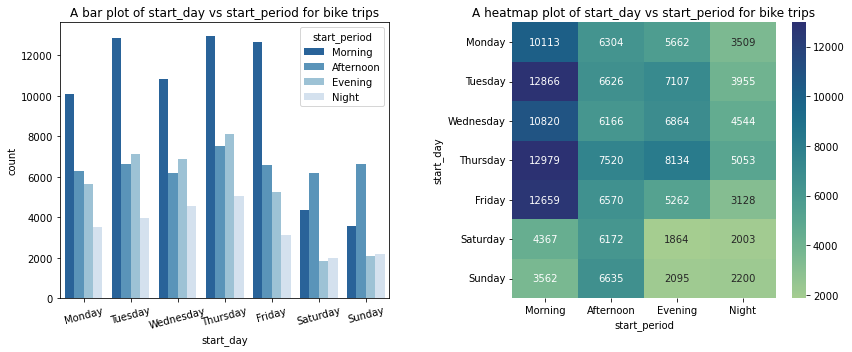

In [38]:
#order the start and end periods of the dataset
ordered_start_classes = ['Morning', 'Afternoon', 'Evening', 'Night']
ordered_classes = pd.api.types.CategoricalDtype(ordered=True, categories=ordered_start_classes)
df['start_period'] = df['start_period'].astype(ordered_classes)
df['end_period'] = df['start_period'].astype(ordered_classes)

#create a new dataframe of ordered start_day, start_periods and its counts 
daily_p_counts = df.groupby(['start_day','start_period']).size()
daily_p_counts = daily_p_counts.reset_index(name='count')
daily_p_counts = daily_p_counts.pivot(index='start_day', columns='start_period', values='count')

#A clustered bar plot of bike trips start days of the week vs. start daily periods 
countplot_heatmap('start_day', 'start_period', 'Blues_r', df, daily_p_counts,'crest')

## Visualization 5  - Pointplot of Start period vs Trip Distance and Start Period vs Trip Duration 

Lastly, I decided to illustrate the period of a day with the peak average trip duration and distance covered. This was capture using a two pointplots in the sub-slide below 

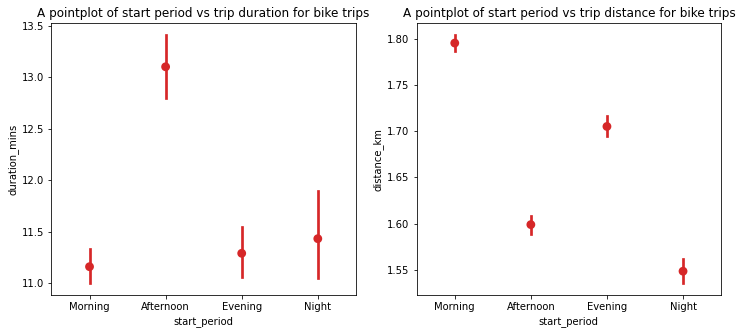

In [39]:
def pointplot(df, x, y):
    base_color = sns.color_palette()[3]
    sns.pointplot(data=df, x=x, y=y, color=base_color,linestyles="")
    
# Pointplot: start_period vs ave_speed 
plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.title('A pointplot of start period vs trip duration for bike trips')
pointplot(df, 'start_period', 'duration_mins')

plt.subplot(1,2,2)
plt.title('A pointplot of start period vs trip distance for bike trips')
pointplot(df, 'start_period', 'distance_km')

In [40]:
!jupyter nbconvert Part_II_slide_deck_File.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_File.ipynb to slides
[NbConvertApp] Writing 853475 bytes to Part_II_slide_deck_File.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\omoni\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\omoni\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\omoni\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\omoni\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\omoni\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename